In [20]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit

In [21]:
# Read the data
df = pd.read_csv("car_insurance.csv")

In [22]:
# Explore the data - check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [4]:
# Explore the data - check missing values
df.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

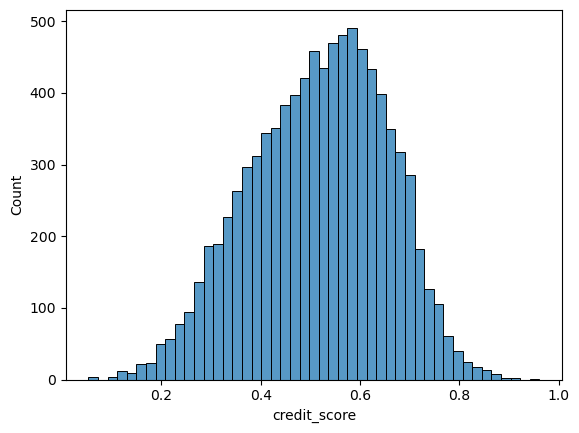

In [23]:
# Check distribution of credit_score

sns.histplot(df["credit_score"])

<AxesSubplot:xlabel='annual_mileage', ylabel='Count'>

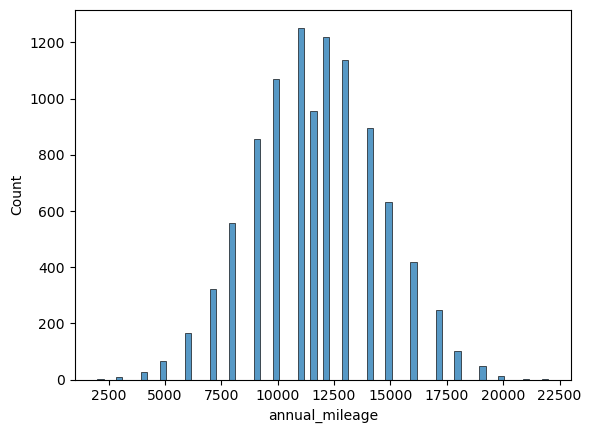

In [18]:
# Check distribution of annual_mileage

sns.histplot(df["annual_mileage"])

In [17]:
# As values appear to be normally distributed, replace missing values with the mean

df["credit_score"].fillna(df["credit_score"].mean(), inplace=True)
df["annual_mileage"].fillna(df["annual_mileage"].mean(), inplace=True)

In [16]:
# Create an empty list to store each model

models = []

# Create a variable selecting columns to be used as features to predict the outcome   

features = df.drop(["outcome", "id"], axis=1).columns

# Loop through each feature, create a model and append it to the list of models

for col in features:
    model = logit(f"outcome ~ {col}", data=df).fit()
    models.append(model)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [14]:
# Create an empty list to store accuracy scores

accuracies = []

# Loop through each model, calculate accuracy, and append it to the list of accuracy scores

for feature in range (0, len(models)):
    confusion_matrix = models[feature].pred_table()
    # Subset confusion matrix to extract true negatives, true positives, false negatives, and false positives
    tn = confusion_matrix[0,0]
    tp = confusion_matrix[1,1]
    fn = confusion_matrix[1,0]
    fp = confusion_matrix[0,1]
    # Compute accuracy
    accuracy = (tn + tp) / (tn + fn + fp + tp)
    accuracies.append(accuracy)

In [15]:
# Find the feature with the largest accuracy

best_accuracy = max(accuracies)
best_feature = features[accuracies.index(best_accuracy)]

print(f"{best_feature}: {best_accuracy}")

driving_experience: 0.7771
